In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci # you need to specify exact sub-packages that you need

Length of index is 91


<Axes: >

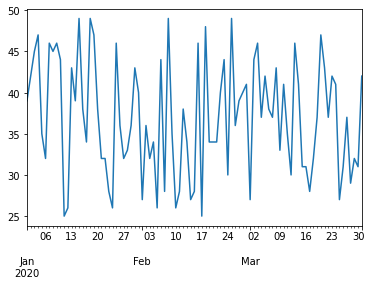

In [3]:
start_date = "Jan 1, 2020"
end_date = "Mar 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot()

<Axes: >

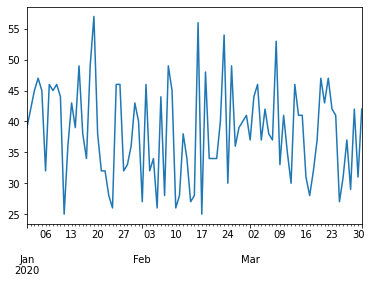

In [4]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
total_items = items_sold.add(additional_items,fill_value=0)
total_items.plot()

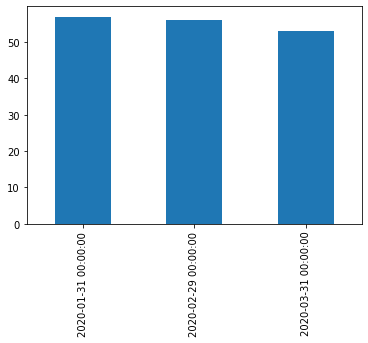

In [5]:
monthly = total_items.resample("1M").max()
ax = monthly.plot(kind='bar')

In [6]:
a = pd.Series(range(1,11))
b = pd.Series(["I","like","to","play","games","and","will","not","change", "python"],index=range(0,10))
df = pd.DataFrame([a,b])

df

,0,1,2,3,4,5,6,7,8,9
0,1,2,3,4,5,6,7,8,9,10
1,I,like,to,play,games,and,will,not,change,python


In [7]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,play
4,5,games
5,6,and
6,7,will
7,8,not
8,9,change
9,10,python


In [15]:
df = pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,play
4,5,games
5,6,and
6,7,will
7,8,not
8,9,change
9,10,python


In [12]:
df.iloc[:5]

,N,O
0,1,I
1,2,like
2,3,to
3,4,play
4,5,games


In [16]:
df['DivA'] = df['A']-df['A'].mean() 

In [18]:
df['LenB'] = df['B'].apply(lambda x : len(x))
# or 
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,I,-4.5,1
1,2,like,-3.5,4
2,3,to,-2.5,2
3,4,play,-1.5,4
4,5,games,-0.5,5
5,6,and,0.5,3
6,7,will,1.5,4
7,8,not,2.5,3
8,9,change,3.5,6
9,10,python,4.5,6


In [19]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

,Count,Mean
LenB,,
1,1,1.000000
2,1,3.000000
3,2,7.000000
4,3,4.333333
5,1,5.000000
6,2,9.500000
